<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Aula03_Bioestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão da aula 2

O que vocês lembram da aula anterior?

# Aula nova!

In [61]:
import numpy as np
import statistics as stats

# Conjuntos de dados
conjunto_a = [5, 5, 5, 10, 20]
conjunto_b = [4, 5, 5, 11, 20]
conjunto_c = [3, 5, 5, 12, 20]

# Lista com todos os conjuntos para iterar
dados = {'Conjunto A': conjunto_a, 'Conjunto B': conjunto_b, 'Conjunto C': conjunto_c}

print(dados)


{'Conjunto A': [5, 5, 5, 10, 20], 'Conjunto B': [4, 5, 5, 11, 20], 'Conjunto C': [3, 5, 5, 12, 20]}


## Calcular e exibir as medidas para cada conjunto

In [62]:
for nome, lula in dados.items():
    media = np.mean(lula)
    mediana = np.median(lula)

    # A moda pode ter mais de um valor, então a biblioteca retorna uma lista
    try:
        moda = stats.multimode(lula)
    except stats.StatisticsError:
        # Lida com o caso de não haver moda única
        moda = "Não há uma moda única"

    print(f"--- {nome} ---")
    print(f"Dados: {lula}")
    print(f"Média: {media}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}\n")

--- Conjunto A ---
Dados: [5, 5, 5, 10, 20]
Média: 9.0
Mediana: 5.0
Moda: [5]

--- Conjunto B ---
Dados: [4, 5, 5, 11, 20]
Média: 9.0
Mediana: 5.0
Moda: [5]

--- Conjunto C ---
Dados: [3, 5, 5, 12, 20]
Média: 9.0
Mediana: 5.0
Moda: [5]



In [63]:
import matplotlib.pyplot as plt
import numpy as np

min_val = min(min(conjunto_a), min(conjunto_b), min(conjunto_c))
print(min_val)

3


In [64]:
max_val = max(max(conjunto_a), max(conjunto_b), max(conjunto_c))
print(max_val)

20


## Gráficos de dispersão

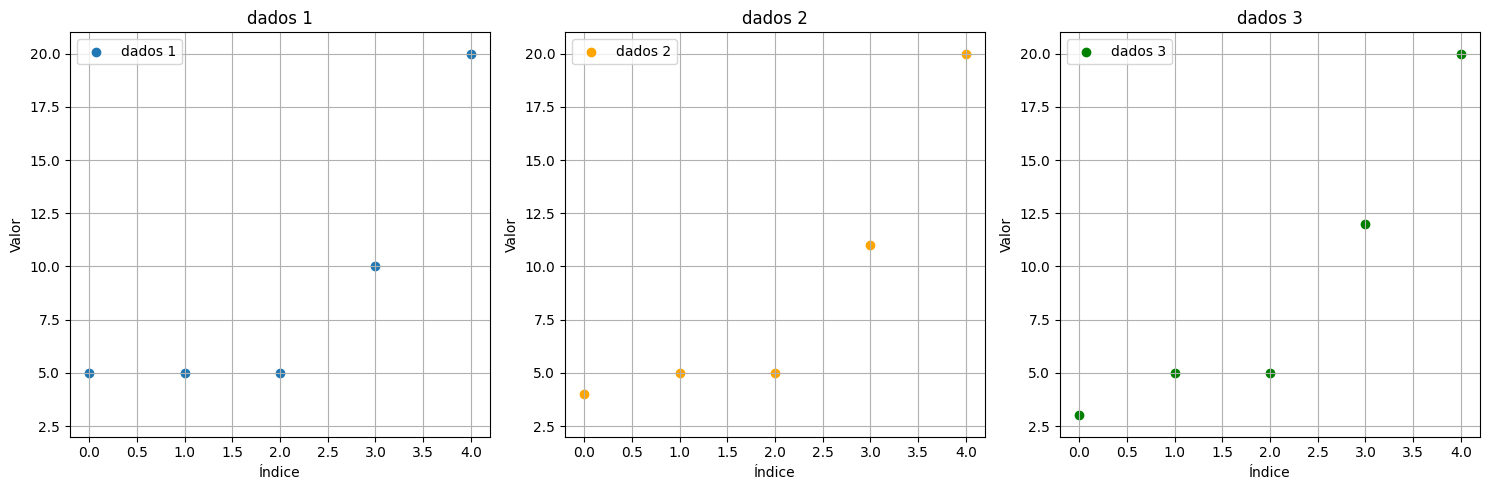

In [65]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(len(conjunto_a)), conjunto_a, label='dados 1')
plt.ylim([min_val - 1, max_val + 1])
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("dados 1")
plt.grid(True)
plt.legend()


plt.subplot(1, 3, 2)
plt.scatter(range(len(conjunto_b)), conjunto_b, label='dados 2', color='orange')
plt.ylim([min_val - 1, max_val + 1])
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("dados 2")
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(range(len(conjunto_c)), conjunto_c, label='dados 3', color='green')
plt.ylim([min_val - 1, max_val + 1])
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("dados 3")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
print("Variância:", np.var(conjunto_a, ddof =1))

Variância: 42.5


In [67]:
print("dados 2:")
print("Variância:", np.var(conjunto_b, ddof =1))


dados 2:
Variância: 45.5


In [68]:
print("dados 3:")
print("Variância:", np.var(conjunto_c, ddof =1))

dados 3:
Variância: 49.5


# Calculo da variância (manualmente)

In [69]:
variancia_conjunto_a = np.sum((conjunto_a-np.mean(conjunto_a))**2)/(len(conjunto_a)-1)

print(variancia_conjunto_a)

42.5


In [70]:
print(dados)

{'Conjunto A': [5, 5, 5, 10, 20], 'Conjunto B': [4, 5, 5, 11, 20], 'Conjunto C': [3, 5, 5, 12, 20]}


In [71]:
for nome, pokemon in dados.items():

    Amplitude = np.max(pokemon) - np.min(pokemon)

    Variancia = np.var(pokemon, ddof=1)

    Desvio_Padrao = np.std(pokemon, ddof=1)

    print(f"--- {nome} ---")
    print(f"Amplitude: {Amplitude}")
    print(f"Variância: {Variancia:.2f}")
    print(f"Desvio Padrão: {Desvio_Padrao:.2f}\n")

--- Conjunto A ---
Amplitude: 15
Variância: 42.50
Desvio Padrão: 6.52

--- Conjunto B ---
Amplitude: 16
Variância: 45.50
Desvio Padrão: 6.75

--- Conjunto C ---
Amplitude: 17
Variância: 49.50
Desvio Padrão: 7.04



# Cenário do Experimento: Efeito de um Novo Fertilizante em Plantas de Soja

Um **biólogo** queria testar o efeito de um novo fertilizante no crescimento de plantas de soja. Ele dividiu 30 plantas em três grupos: um grupo controle (sem fertilizante), um grupo com fertilizante padrão e um grupo com o novo fertilizante. Após 45 dias, ele mediu várias características das plantas.

# Dados para estudar na aula

* id: ID da Planta
* tratamento: Grupo de Tratamento
* tipo_solo: Tipo de Solo
* ph: pH do Solo
* altura: Altura (cm)
* peso_folhagem: Peso da Folhagem (g)
* numero_vagens: Número de Vagens
* qualidade_folhagem: Qualidade da Folhagem


In [72]:
import pandas as pd
import numpy as np

dados_csv = pd.read_csv("soja.csv", encoding= "latin-1")
dados_csv = dados_csv.drop('id', axis=1)
dados_csv.head()

,tratamento,tipo_solo,ph,altura,peso,numero_vagens,qualidade_folhagem
0,Controle,Argiloso,6.5,45.2,55.8,12,Baixa
1,Padrão,Arenoso,6.8,58.9,72.1,18,Média
2,Novo Fertilizante,Húmus,7.1,75.4,95.5,25,Alta
3,Controle,Argiloso,6.4,48.1,60.3,14,Baixa
4,Padrão,Arenoso,6.7,62.5,78.2,20,Média


# Medidas de variabilidade

Determine a amplitude, variância e desvio padrão das variáveis Peso da Folhagem (g) e Número de Vagens. Qual das duas variáveis em estudo possui maior variabilidade?


In [73]:
# Amplitude

In [74]:
# Variância

In [75]:
# Desvio padrão

In [76]:
# Coeficiente de variação

# Medidas de posição

Determine o **Q1, Q2, Q3** para a variável **Peso da Folhagem**. Interprete os resultados.

In [77]:
# Q1
q1_peso = dados_csv['peso'].quantile(0.25)
print(f"Q1 (Peso da Folhagem): {q1_peso:.2f}")

Q1 (Peso da Folhagem): 60.45


In [78]:
# Q2
q2_peso = dados_csv['peso'].quantile(0.50)
print(f"Q2 (Peso da Folhagem): {q2_peso:.2f}")

Q2 (Peso da Folhagem): 77.45


In [79]:
# Q3
q3_peso = dados_csv['peso'].quantile(0.75)
print(f"Q3 (Peso da Folhagem): {q3_peso:.2f}")

Q3 (Peso da Folhagem): 92.45


In [80]:
# IQR
IQR = q3_peso - q1_peso
print(f"IQR (Peso da Folhagem): {IQR:.2f}")

IQR (Peso da Folhagem): 32.00


In [81]:
# Q1 - 1.5*IQR
q1_peso_min = q1_peso - 1.5*IQR
print(f"Q1 - 1.5*IQR (Peso da Folhagem): {q1_peso_min:.2f}")

Q1 - 1.5*IQR (Peso da Folhagem): 12.45


In [82]:
# Q3 + 1.5*IQR
q3_peso_max = q3_peso + 1.5*IQR
print(f"Q3 + 1.5*IQR (Peso da Folhagem): {q3_peso_max:.2f}")

Q3 + 1.5*IQR (Peso da Folhagem): 140.45


# Boxplot (gráfico de caixas-e-bigodes)

Faça um boxplot para a variável **Peso da Folhagem**. Interprete os resultados.

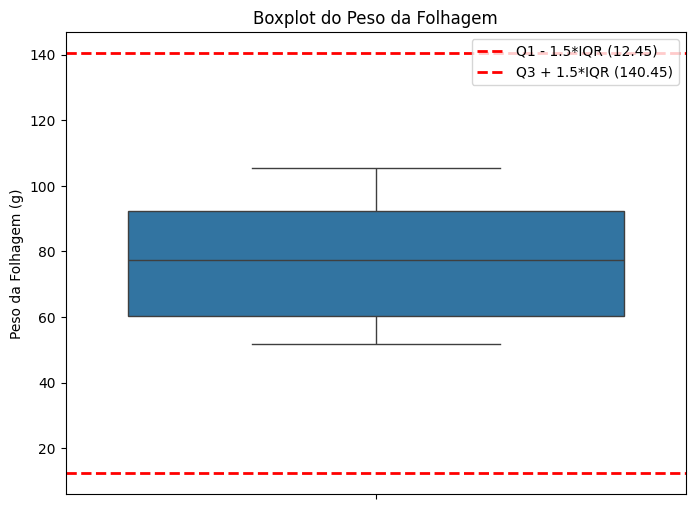

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=dados_csv['peso'])
plt.title('Boxplot do Peso da Folhagem')
plt.ylabel('Peso da Folhagem (g)')

# Adicionar linhas tracejadas para q1_peso_min e q3_peso_max
ax.axhline(q1_peso_min, color='red', linestyle='--', linewidth=2, label=f'Q1 - 1.5*IQR ({q1_peso_min:.2f})')
ax.axhline(q3_peso_max, color='red', linestyle='--', linewidth=2, label=f'Q3 + 1.5*IQR ({q3_peso_max:.2f})')
ax.legend()

plt.show()

In [84]:
nova_variavel = [dados_csv['peso'], 150]

Q1: 60.60
Q3: 94.15
IQR: 33.55
Q1 - 1.5*IQR: 10.27
Q3 + 1.5*IQR: 144.48


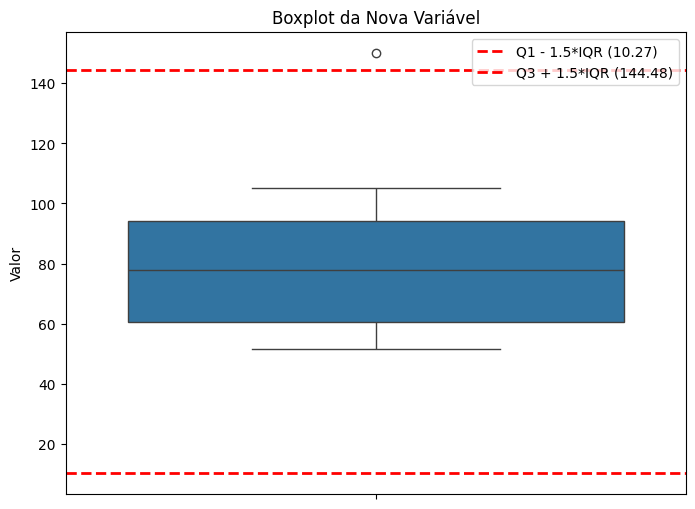

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine the data from nova_variavel into a single Series for plotting
nova_variavel_series = pd.concat([nova_variavel[0], pd.Series([nova_variavel[1]])])

# Calculate Q1, Q3, and IQR
q1_nova = nova_variavel_series.quantile(0.25)
q3_nova = nova_variavel_series.quantile(0.75)
IQR_nova = q3_nova - q1_nova

# Calculate Q1 - 1.5*IQR and Q3 + 1.5*IQR
q1_nova_min = q1_nova - 1.5 * IQR_nova
q3_nova_max = q3_nova + 1.5 * IQR_nova

print(f"Q1: {q1_nova:.2f}")
print(f"Q3: {q3_nova:.2f}")
print(f"IQR: {IQR_nova:.2f}")
print(f"Q1 - 1.5*IQR: {q1_nova_min:.2f}")
print(f"Q3 + 1.5*IQR: {q3_nova_max:.2f}")


plt.figure(figsize=(8, 6))
ax = sns.boxplot(y=nova_variavel_series)
plt.title('Boxplot da Nova Variável')
plt.ylabel('Valor')

# Add dashed red lines for q1_nova_min and q3_nova_max
ax.axhline(q1_nova_min, color='red', linestyle='--', linewidth=2, label=f'Q1 - 1.5*IQR ({q1_nova_min:.2f})')
ax.axhline(q3_nova_max, color='red', linestyle='--', linewidth=2, label=f'Q3 + 1.5*IQR ({q3_nova_max:.2f})')
ax.legend()

plt.show()